In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store_numba import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'calc_csat.py',
 'model_equations_separate_NC_store.py',
 'model_equations_separate_NC_store_numba.py',
 'Model_Parameters Store model.xlsx',
 'model_param_sensitivity_ponly.ipynb',
 'model_store_cc debug.ipynb',
 'model_store_cc.ipynb',
 'model_store_ponly.ipynb',
 'model_store_ponly_find_lsq_x0.ipynb',
 'reference_10cc.xlsx',
 'reference_10cc_axenic.xlsx',
 'reference_pro99_axenic.xlsx',
 'results',
 'results_postprocess.py',
 'run_files',
 'run_least_squares_het.py',
 'run_least_squares_ponly.py',
 'run_monte.py',
 'run_shgo_ponly.py',
 'tmp',
 'VPRO',
 '__pycache__']

In [6]:
refdf = pd.read_excel('reference_pro99_axenic.xlsx',)


In [7]:
param_vals = get_param_vals('OVERFLOW')
param_vals = get_param_vals('MIXOTROPH')
param_vals = get_param_vals('EXOENZYME')


In [8]:
model = 'MIN'
jsonl=[]
pro99_mode = True

which_organism = 'ponly'
maxday = 100
new_param_vals = get_param_vals_from_json_list(model, jsonl)
suffix = get_runid_unique_suffix(pro99_mode, which_organism, model, new_param_vals)
t_eval, t_end = get_t_eval_and_t_end(None, refdf, maxday)
(var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
    ) = get_constants_per_organism(pro99_mode, which_organism)
par_tuple = prepare_params_tuple(new_param_vals)


In [9]:
print_dydt0(calc_dydt, var_names, init_var_vals,par_tuple)


dBp/dt = -2.07e-06, init Bp = 8.93e-01, newval = 8.93e-01
dNp/dt = 1.35e-05, init Np = 0.00e+00, newval = 1.35e-05
dCp/dt = 6.83e-05, init Cp = 0.00e+00, newval = 6.83e-05
dDON/dt = 1.86e-06, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 2.07e-07, init RDON = 0.00e+00, newval = 2.07e-07
dDIN/dt = -1.35e-05, init DIN = 8.00e+02, newval = 8.00e+02
dDOC/dt = 1.23e-05, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 1.37e-06, init RDOC = 0.00e+00, newval = 1.37e-06
dDIC/dt = -6.83e-05, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = 0.00e+00, init ROS = 2.00e-01, newval = 2.00e-01


In [10]:
print_intermediate0(intermediate_func, interm_names, init_vars)


NameError: name 'intermediate_func' is not defined

In [11]:
biomass_diff0_ponly(calc_dydt, var_names,init_vars)


NameError: name 'init_vars' is not defined

In [12]:
var_names

['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS']

In [13]:
init_var_vals

array([8.92857143e-01, 0.00000000e+00, 0.00000000e+00, 2.00000000e+01,
       0.00000000e+00, 8.00000000e+02, 1.32500000e+02, 0.00000000e+00,
       2.24155230e+03, 2.00000000e-01])

In [14]:
#sol = run_solver(calc_dydt, init_vars)
#sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))
MSE_err, new_param_vals, df, mse_df = run_solver_from_new_params(
    new_param_vals, refdf, 
    init_var_vals, 
    calc_dydt, prepare_params_tuple, t_end , t_eval, var_names, intermediate_names,return_dfs=True
)


"['ref_Bp'] not in index"


In [15]:
df.head()

,Bp,Np,Cp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,uptakeCp,QCp,biosynthesisNp,respirationCp,biomass_breakdownCp,overflowNp,overflowCp,Bp[C],Bptotal,Bptotal[C]
0,0.892857,0.000000,0.000000,20.000000,0.000000,800.000000,132.500000,0.000000,2241.552301,0.2,...,0.000081,6.625000,4.260421e-10,0.000012,0.0,0.0,0.0,5.915179,0.892857,5.915179
1,1.318605,0.479942,2.505128,20.185952,0.023508,798.884850,133.702962,0.148500,2235.152211,0.2,...,0.000132,6.249982,1.323532e-05,0.000019,0.0,0.0,0.0,8.735758,1.798547,11.240886
2,2.698619,1.009057,5.261941,20.607816,0.078699,796.498665,136.413434,0.493045,2221.564058,0.2,...,0.000271,6.241184,2.780033e-05,0.000039,0.0,0.0,0.0,17.878350,3.707676,23.140291
3,6.128401,2.292295,11.953215,21.650824,0.215237,790.606099,143.113666,1.345188,2188.869039,0.2,...,0.000616,6.241036,6.315225e-05,0.000089,0.0,0.0,0.0,40.600659,8.420697,52.553874
4,12.964832,4.849430,25.287431,23.729694,0.487381,778.861520,156.468209,3.043643,2124.432386,0.2,...,0.001304,6.241036,1.336007e-04,0.000188,0.0,0.0,0.0,85.892011,17.814262,111.179443


In [16]:
mdf = df.melt(id_vars=['t', 'day'])

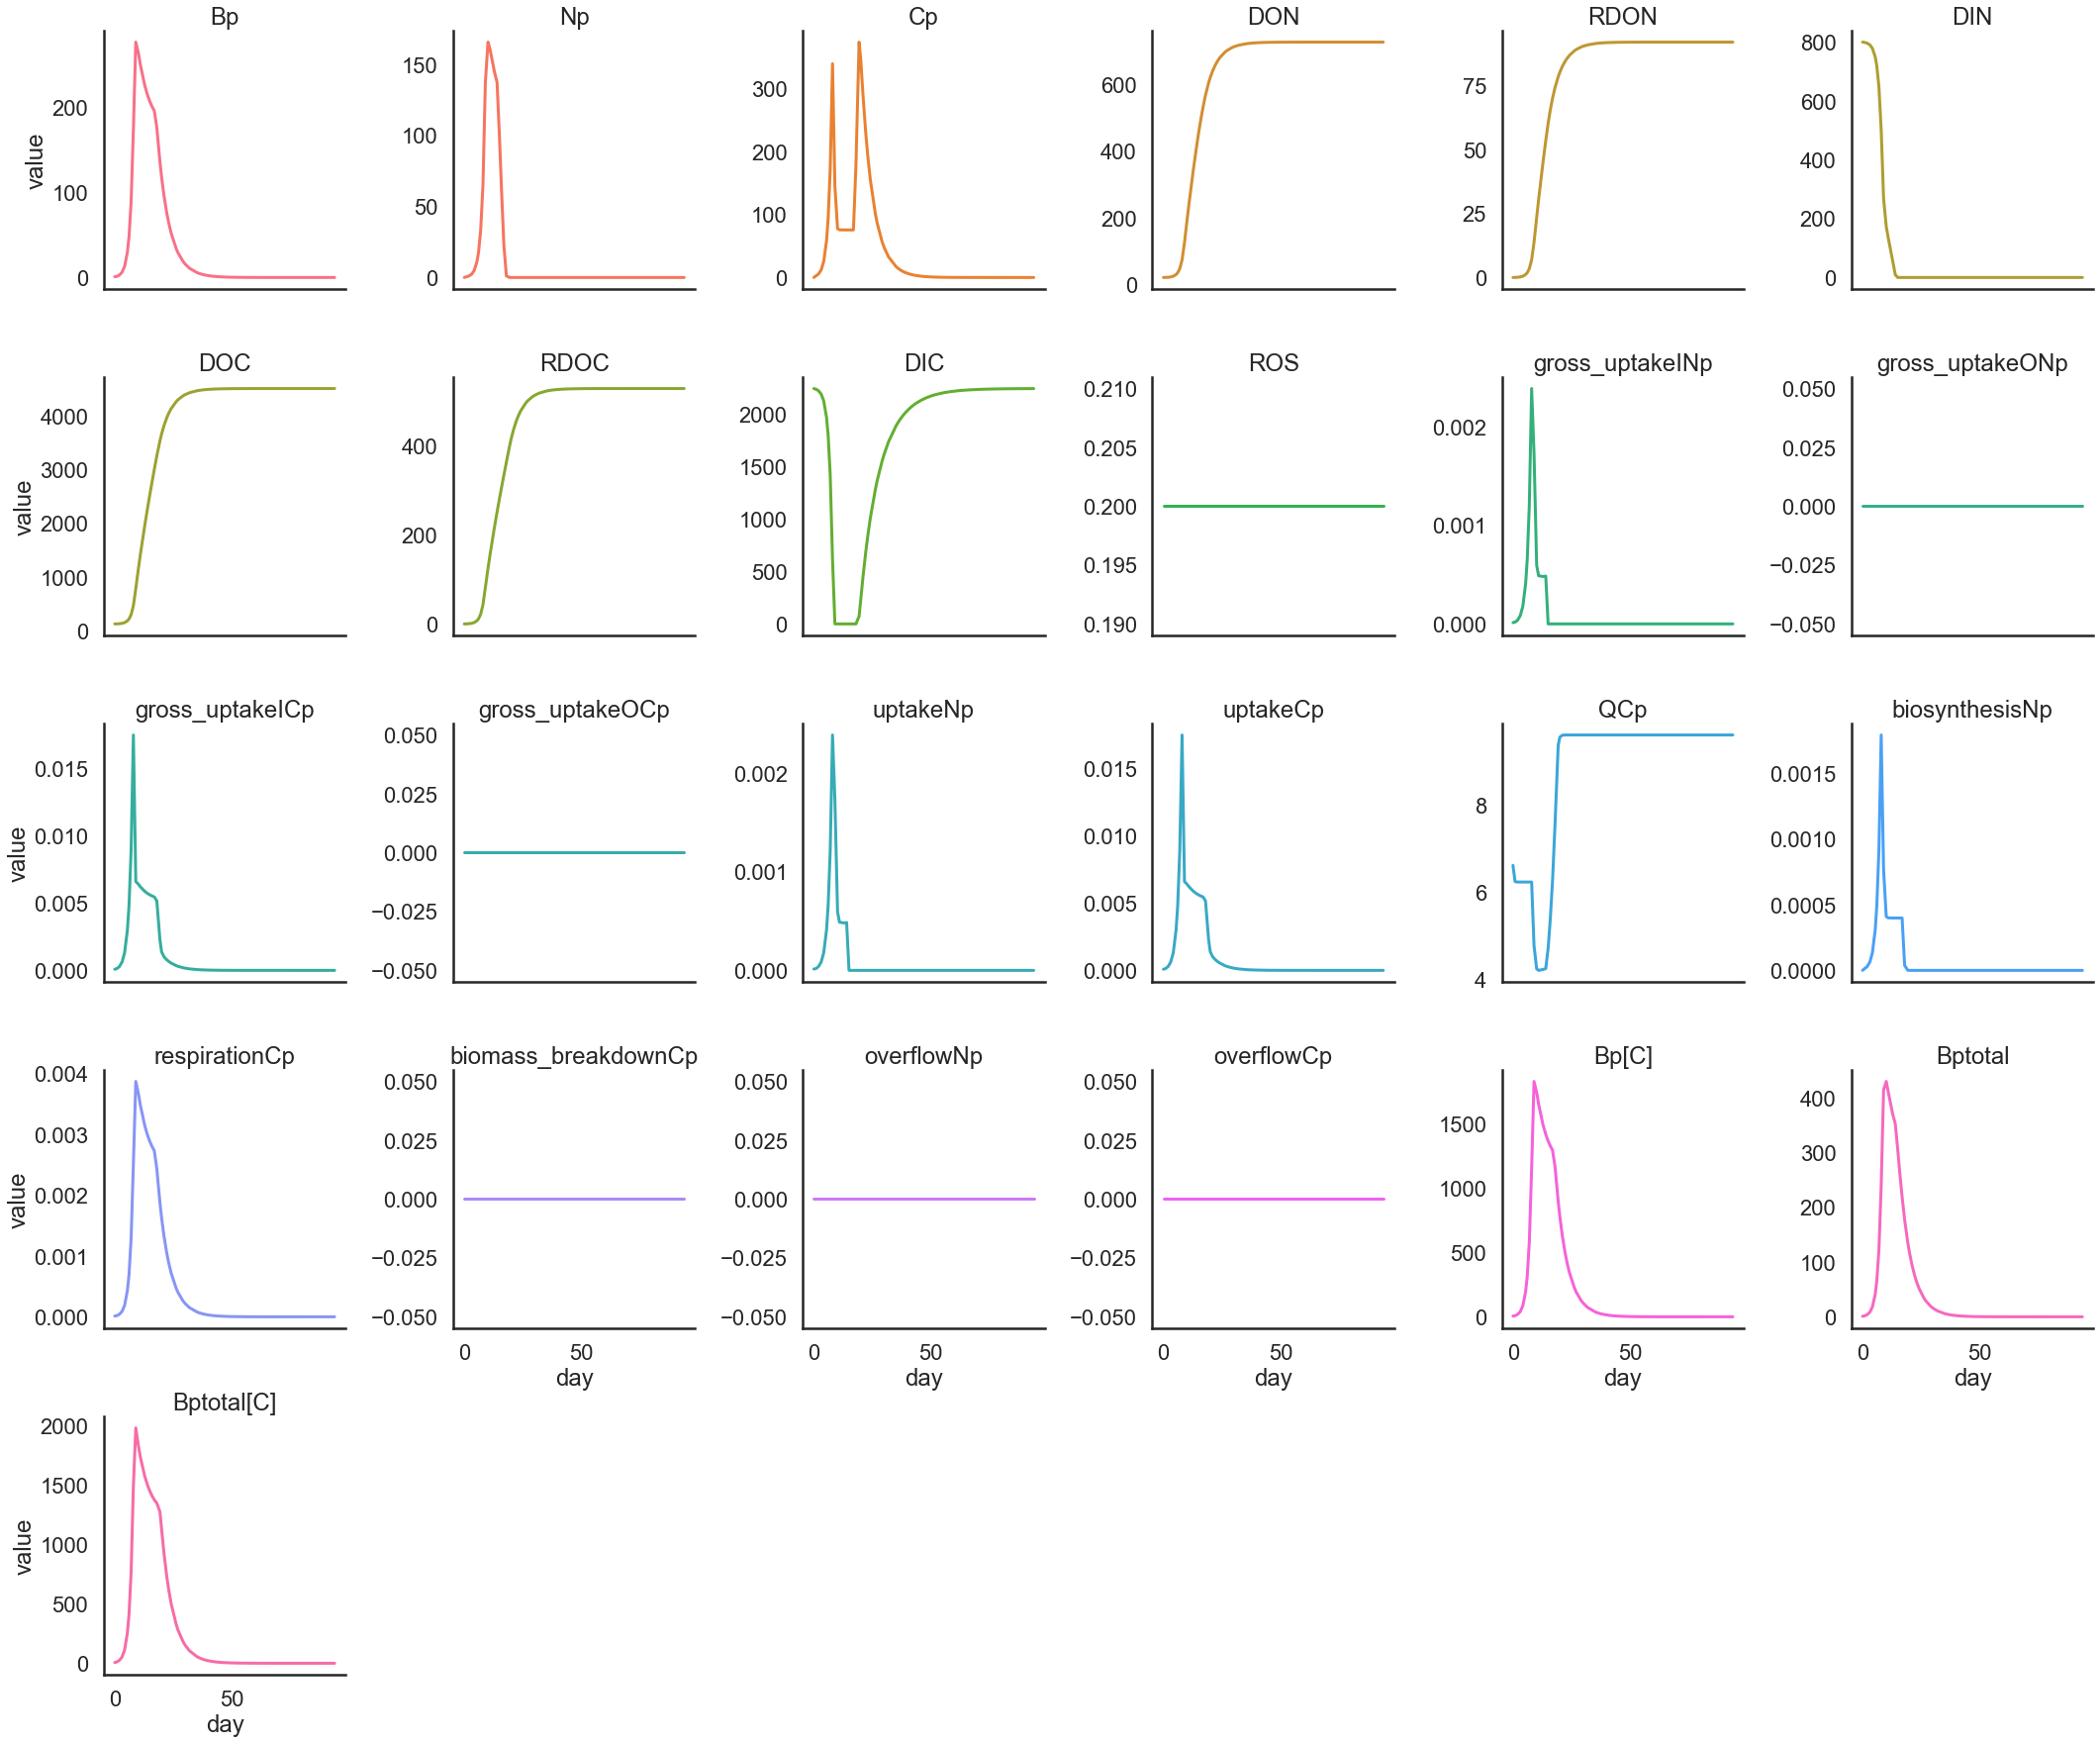

In [17]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

ValueError: Could not interpret value `ref_Bp` for parameter `y`

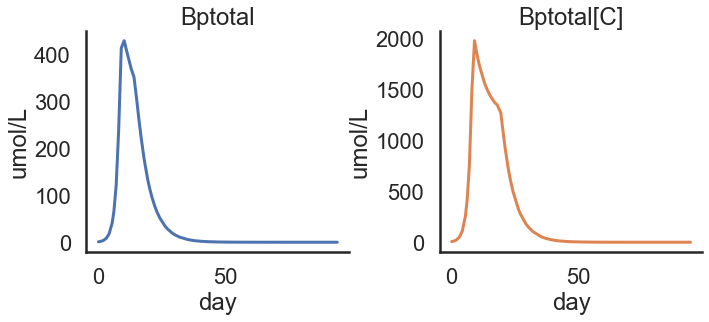

In [18]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Bptotal', 'Bptotal[C]'])], x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}').set(ylabel='umol/L')
sns.lineplot(data=refdf, x='day', y='ref_Bp',
            units='Sample', estimator=None,
            legend=False,
            ax=g.axes[0], color='black', zorder=1, lw=0.5,
           )
sns.lineplot(data=refdf, x='day', y='ref_Bp[C]',
            units='Sample', estimator=None,
            legend=False,
            ax=g.axes[1], color='black', zorder=1,lw=0.5,
           )
    
plt.show()

In [ ]:
refdf['ref_Bp[C]'] = refdf['ref_Bp'] * 7 

In [ ]:
sns.relplot(data=refdf, x='day', y='ref_Bp',
            kind='line', 
            units='Sample', estimator=None,
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.title('N pro99')
plt.show()

In [ ]:
sns.relplot(data=refdf, x='day', y='ref_Bp[C]',
            kind='line', 
            units='Sample', estimator=None,
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.title('C pro99')
plt.show()

In [ ]:
50/7, 25*7

In [ ]:
40 / 14 * 4.5 * 12

In [ ]:
mse_df

In [ ]:
compute_mse(df,refdf)

In [ ]:
refdf.columns

In [ ]:
df.min()

In [ ]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol N/l')
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol C/l')
#sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')



In [ ]:
from matplotlib.colors import LinearSegmentedColormap
df.clip(lower=0)[pnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df.clip(lower=0)[pcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()


In [ ]:
len(param_vals)

In [ ]:
df.min()